In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from centroid_neural_networks import remove_element, centroid_neural_net, centroid_neural_net_detected_weights

In [3]:
def plot_cnn_result(input_data, centroids, cluster_indices, figure_size=(8,8)):

    X = input_data
    num_clusters = len(centroids)

    plt.figure(figsize=figure_size)


    cnn_cluster_elements = []

    for i in range(num_clusters):
        display = []
        for x_th in range(len(X)):
            if cluster_indices[x_th] == i:
                display.append(X[x_th])

        cnn_cluster_elements.append(display)

        display = np.array(display)
        plt.scatter(display[:,0], display[:,1])
        plt.scatter(centroids[i][0], centroids[i][1], s=200, c='red')
        plt.text(centroids[i][0], centroids[i][1], f"Cluster {i}", fontsize=14)        

    plt.show()

# Centroid Neural Network

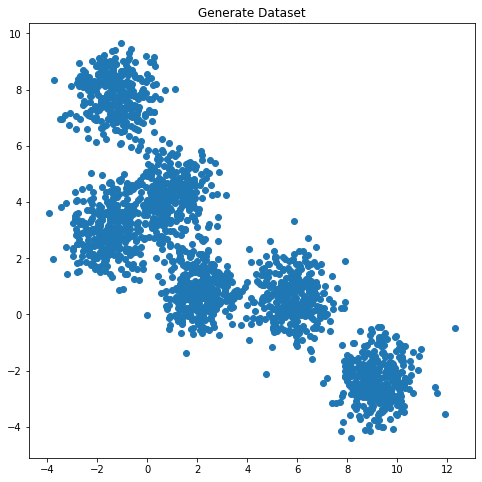

In [4]:
# Sample data
X, y = make_blobs(n_samples=2000, centers=6, cluster_std=0.8, random_state=0)
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1])
plt.title("Generate Dataset")
plt.show()

In [5]:
num_clusters = 6
centroids, w, cluster_indices, cluster_elements = centroid_neural_net(X, num_clusters, max_iteration = 50, epsilon = 0.05)

Reach the Desired Number of Clusters. Stop at Epoch  31


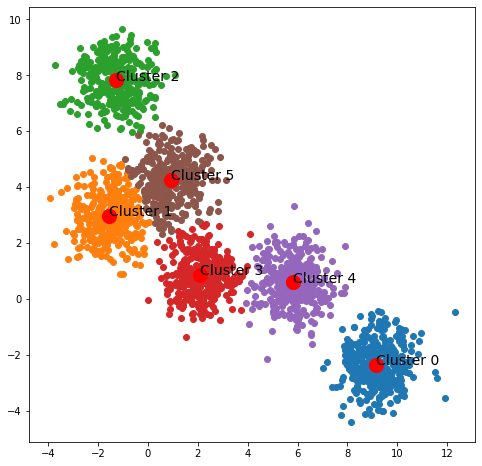

In [6]:
plot_cnn_result(X, centroids, cluster_indices, figure_size=(8,8))

# Generalized Centroid Neural Network (g-CNN)

In [7]:
num_subdata = 50
new_data = []
for i in range(num_subdata):
    subdata = []
    for j in range(len(X)//num_subdata):
        x_i = X[(len(X)//num_subdata)*i + j]
        subdata.append(x_i)
    new_data.append(subdata)
new_data = np.array(new_data)
print(np.array(new_data).shape)

(50, 40, 2)


In [9]:
num_clusters = 6

centroids = []
w = []
cluster_indices = []
cluster_elements = []

for subdata_i in new_data:
    # subdata_i = np.array(subdata_i)
    centroids_, w_, cluster_indices_, cluster_elements_ = centroid_neural_net(subdata_i, num_clusters, max_iteration = 50, epsilon = 0.05)
    
    centroids.append(centroids_)
    w.append(w_)
    cluster_indices.append(cluster_indices_)
    cluster_elements.append(cluster_elements_)

Reach the Desired Number of Clusters. Stop at Epoch  12
Reach the Desired Number of Clusters. Stop at Epoch  12
Reach the Desired Number of Clusters. Stop at Epoch  15
Reach the Desired Number of Clusters. Stop at Epoch  13
Reach the Desired Number of Clusters. Stop at Epoch  13
Reach the Desired Number of Clusters. Stop at Epoch  10
Reach the Desired Number of Clusters. Stop at Epoch  11
Reach the Desired Number of Clusters. Stop at Epoch  15
Reach the Desired Number of Clusters. Stop at Epoch  12
Reach the Desired Number of Clusters. Stop at Epoch  13
Reach the Desired Number of Clusters. Stop at Epoch  10
Reach the Desired Number of Clusters. Stop at Epoch  11
Reach the Desired Number of Clusters. Stop at Epoch  17
Reach the Desired Number of Clusters. Stop at Epoch  11
Reach the Desired Number of Clusters. Stop at Epoch  10
Reach the Desired Number of Clusters. Stop at Epoch  15
Reach the Desired Number of Clusters. Stop at Epoch  12
Reach the Desired Number of Clusters. Stop at Ep

In [11]:
# for i in range(num_subdata):
#     plot_cnn_result(new_data[i], centroids[i], cluster_indices[i], figure_size=(8,8))

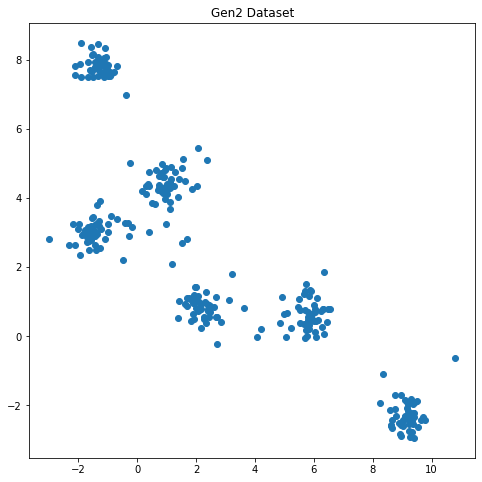

In [12]:
# Create New Data with Detected Centroids
gen2_data = []
for centroids_i in centroids:
    for centroid_ii in centroids_i: 
        gen2_data.append(centroid_ii)

gen2_data = np.array(gen2_data)

plt.figure(figsize=(8, 8))
plt.scatter(gen2_data[:,0], gen2_data[:,1])
plt.title("Gen2 Dataset")
plt.show()

In [13]:
num_clusters = 6
centroids_2, w_2, cluster_indices_2, cluster_elements_2 = centroid_neural_net(gen2_data, num_clusters, max_iteration = 50, epsilon = 0.05)

Reach the Desired Number of Clusters. Stop at Epoch  13


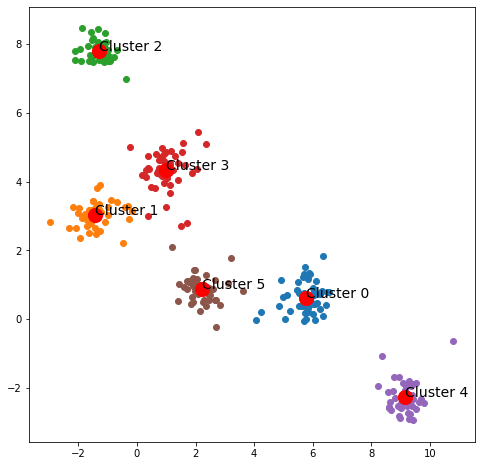

In [14]:
plot_cnn_result(gen2_data, centroids_2, cluster_indices_2, figure_size=(8,8))

In [15]:
# Run G-CNN one more time
detected_weights = centroids_2
centroids, w, cluster_indices, cluster_elements = centroid_neural_net_detected_weights(X, detected_weights, max_iteration = 10)

Stop at Epoch  2


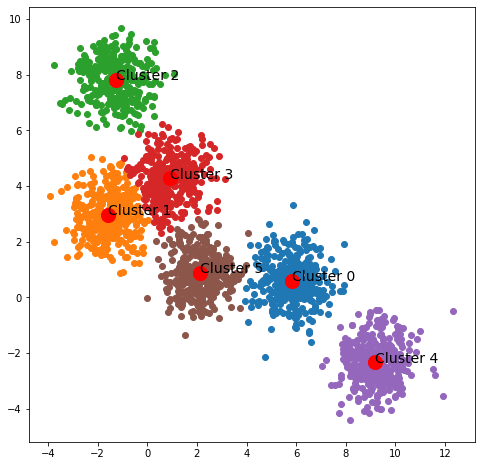

In [16]:
plot_cnn_result(X, centroids, cluster_indices, figure_size=(8,8))